#AULA1 - EXPLORE O NOTEBOOK DO ALUNO

#AULA2 - TESTANDO DIFERENTES VALORES PARA EPS E MIN_SAMPLE

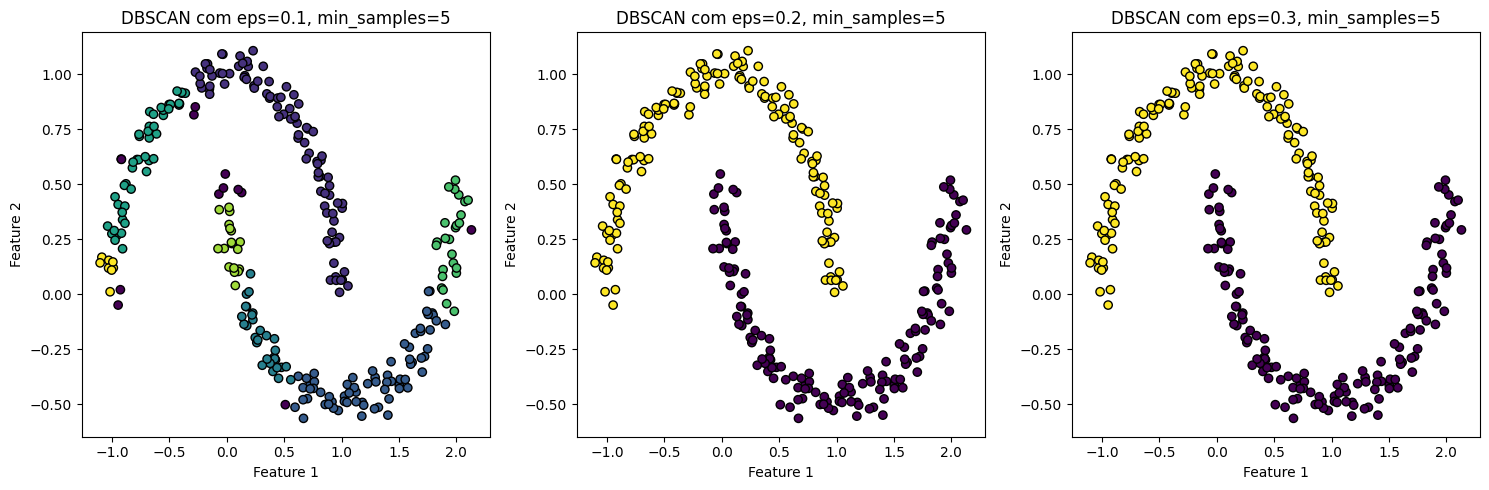

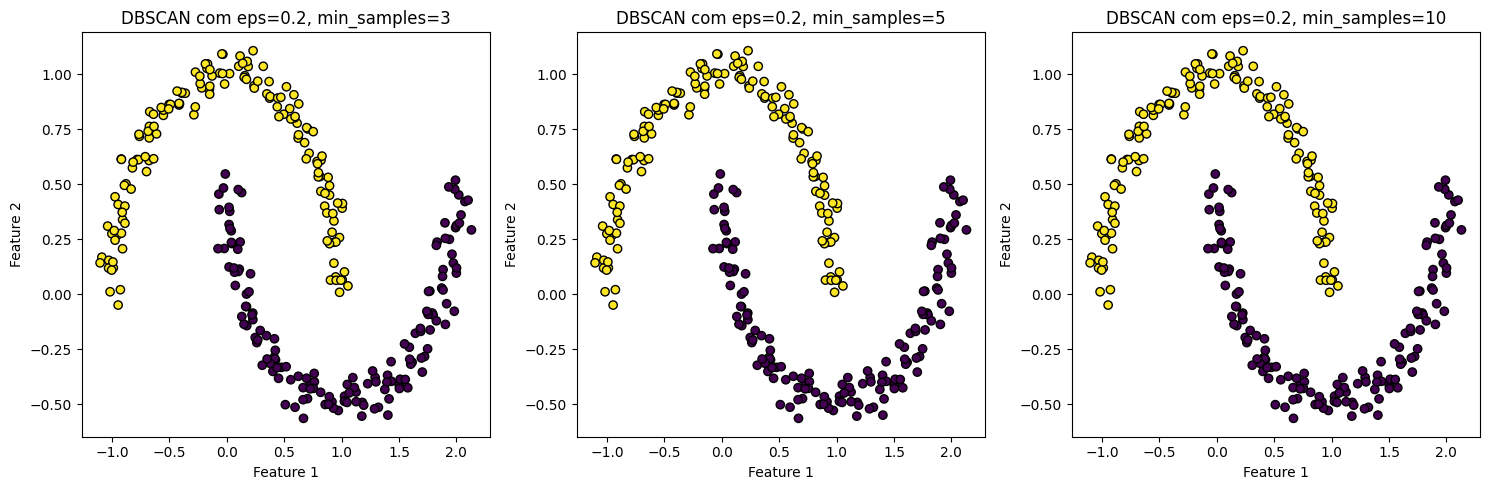

              Configuração  Número de Outliers
0   eps=0.1, min_samples=5                  13
1   eps=0.2, min_samples=5                   0
2   eps=0.3, min_samples=5                   0
3   eps=0.2, min_samples=3                   0
4  eps=0.2, min_samples=10                   0
Arquivo salvo: DBSCAN_Outliers_Analysis.csv


In [1]:
# **1️⃣ Importando bibliotecas necessárias**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# **2️⃣ Criando um dataset com clusters curvos**
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# **3️⃣ Testando diferentes valores de eps para observar as mudanças nos clusters**
eps_values = [0.1, 0.2, 0.3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X)

    axes[i].scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    axes[i].set_title(f"DBSCAN com eps={eps}, min_samples=5")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# **4️⃣ Ajustando min_samples e comparando os resultados**
min_samples_values = [3, 5, 10]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=0.2, min_samples=min_samples)  # Mantendo eps fixo em 0.2
    clusters = dbscan.fit_predict(X)

    axes[i].scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    axes[i].set_title(f"DBSCAN com eps=0.2, min_samples={min_samples}")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# **5️⃣ Identificando pontos de ruído e como eles mudam com diferentes parâmetros**
ruido_counts = {}

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X)
    num_outliers = np.sum(clusters == -1)
    ruido_counts[f"eps={eps}, min_samples=5"] = num_outliers

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=0.2, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    num_outliers = np.sum(clusters == -1)
    ruido_counts[f"eps=0.2, min_samples={min_samples}"] = num_outliers

# **6️⃣ Exibindo os resultados da contagem de ruído**
import pandas as pd

df_ruido = pd.DataFrame(list(ruido_counts.items()), columns=["Configuração", "Número de Outliers"])
print(df_ruido)
# Salvando os resultados em um arquivo CSV para análise
arquivo_outliers = "DBSCAN_Outliers_Analysis.csv"
df_ruido.to_csv(arquivo_outliers, index=False)

# Exibir o caminho do arquivo para download
print(f"Arquivo salvo: {arquivo_outliers}")


**1-O que acontece quando aumentamos eps?**

eps (epsilon) é o parâmetro que define o raio de busca ao redor de cada ponto para determinar seus vizinhos.

Efeitos de aumentar eps:

 Clusters maiores → Com um eps maior, mais pontos são considerados vizinhos e agrupados no mesmo cluster.

 Menos outliers → Um eps grande reduz o número de pontos classificados como ruído (-1), pois mais pontos passam a pertencer a algum cluster.

❌ Clusters pouco definidos → Se eps for muito grande, clusters distintos podem ser unidos erroneamente, formando um único grupo grande.

➡️ Conclusão: Aumentar eps torna o DBSCAN menos sensível a pequenas variações nos dados, mas pode fazer com que diferentes clusters se fundam.

**2- O que acontece quando aumentamos min_samples?**

min_samples define quantos pontos precisam estar dentro do raio eps para que um ponto seja classificado como Core Point.


Efeitos de aumentar min_samples:

✅ Clusters mais compactos e confiáveis → Um min_samples maior exige uma densidade maior para formar um cluster.

✅ Maior robustez contra ruído → Pequenos agrupamentos de pontos isolados deixam de ser formados como clusters, reduzindo falsos positivos.

❌ Mais outliers → Se min_samples for muito alto, muitos pontos podem não atingir a densidade mínima e serão classificados como ruído.

➡️ Conclusão: Aumentar min_samples faz com que apenas áreas de alta densidade sejam consideradas clusters, descartando pequenas aglomerações de pontos.

**3-Como podemos identificar outliers nos resultados?**
O DBSCAN classifica outliers como pontos com rótulo -1.

Maneiras de identificar outliers:

Visualmente nos gráficos: Outliers aparecem como pontos dispersos, que não pertencem a nenhum cluster.

Analisando a contagem de clusters: Se um grande número de pontos recebeu o rótulo -1, pode ser um indício de que eps ou min_samples estão muito restritivos.

Examinando a distribuição dos rótulos: Podemos contar quantos pontos receberam cada rótulo no DBSCAN.

#AULA 3 - IMPLEMENTÇÃO DBSCAN

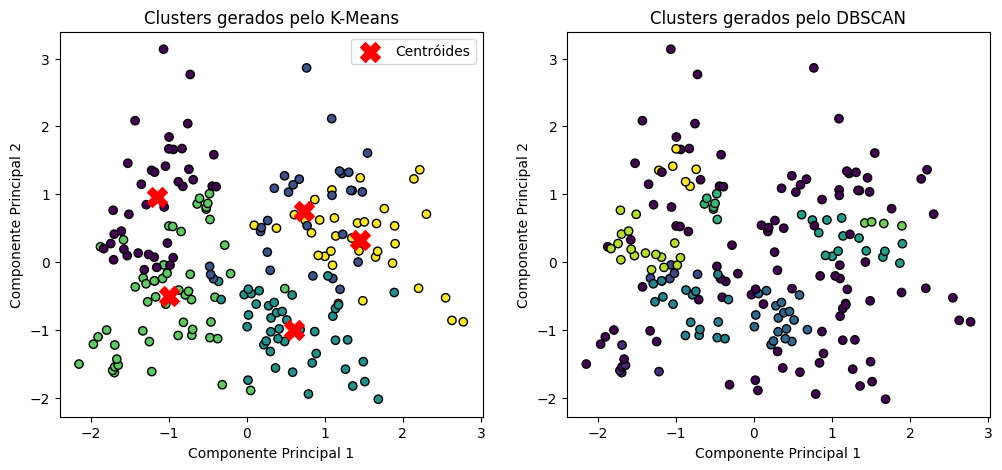

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,Cluster_DBSCAN
0,1,0,19,15,39,3,-1
1,2,0,21,15,81,3,-1
2,3,1,20,16,6,3,-1
3,4,1,23,16,77,3,0
4,5,1,31,17,40,3,-1


O download automático só funciona no Google Colab. Arquivo salvo localmente.


In [2]:
# **Carregar o arquivo enviado Mall_Customer e processar a atividade**

# **1️⃣ Importando bibliotecas**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **2️⃣ Carregar o dataset enviado**
df = pd.read_csv("[DADOS]ANO2C1B4S23A1A2A3A4_Mall_Customers.csv")

# **3️⃣ Pré-processamento**
# Verificando nomes de colunas e ajustando se necessário
df.rename(columns={'Genre': 'Gender'}, inplace=True)  # Ajustando nome da coluna
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Convertendo categórico para numérico

# Definir as features para clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = df[features]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **4️⃣ Aplicando K-Means para comparação**
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# **5️⃣ Aplicando DBSCAN**
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Definindo hiperparâmetros iniciais
y_dbscan = dbscan.fit_predict(X_scaled)

# **6️⃣ Redução de dimensionalidade para visualização**
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# **7️⃣ Visualizando os clusters**
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# **K-Means**
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k')
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
                c='red', marker='X', s=200, label="Centróides")
axes[0].set_title("Clusters gerados pelo K-Means")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")
axes[0].legend()

# **DBSCAN**
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', edgecolors='k')
axes[1].set_title("Clusters gerados pelo DBSCAN")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

plt.show()

# **8️⃣ Adicionando os rótulos de cluster ao DataFrame para análise**
df['Cluster_KMeans'] = y_kmeans
df['Cluster_DBSCAN'] = y_dbscan

# **9️⃣ Exibir os primeiros resultados **
from IPython.display import display
display(df.head())

# **🔟 Opcional: Salvar os resultados em CSV para análise posterior**
df.to_csv("Clusters_KMeans_vs_DBSCAN.csv", index=False)

# **Opcional: Download do arquivo no Google Colab**
try:
    from google.colab import files
    files.download("Clusters_KMeans_vs_DBSCAN.csv")
except:
    print("O download automático só funciona no Google Colab. Arquivo salvo localmente.")


#AULA 4 -  EXERCÍCIOS FIXAÇÃO - QUESTÃO 6

In [ ]:
# **Passo 1: Importação das Bibliotecas**
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregando o dataset
file_path = "[DADOS]ANO2C1B4S23A1A2A3A4_credicard_2023.csv"
df = pd.read_csv(file_path)

# Exibindo as primeiras linhas do dataset
df.head()

# **Passo 2: Pré-processamento dos Dados**
# Verificando informações do dataset
df.info()
# Verificando valores ausentes
df.isnull().sum()
# Selecionando colunas numéricas para clustering
features = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[features]
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Exibindo as primeiras amostras dos dados padronizados
pd.DataFrame(X_scaled, columns=features).head()


# **Passo 3: Aplicação do DBSCAN**
# Aplicando DBSCAN com valores iniciais de eps e min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Adicionando os rótulos ao DataFrame original
df['Cluster_DBSCAN'] = y_dbscan

# Contando quantos pontos foram classificados como ruído (-1)
num_outliers = np.sum(y_dbscan == -1)
num_clusters_dbscan = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)

print(f"Número de clusters detectados pelo DBSCAN: {num_clusters_dbscan}")
print(f"Número de pontos classificados como ruído: {num_outliers}")

# Exibindo os primeiros registros com clusters
df.head()


# **Passo 4: Aplicação do K-Means**

# Aplicando K-Means para comparação
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adicionando os rótulos ao DataFrame original
df['Cluster_KMeans'] = y_kmeans

# Exibindo os primeiros registros com clusters K-Means
df.head()

# **Passo 5: Visualização dos Resultados**

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criando gráficos para comparação
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# DBSCAN
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', edgecolors='k')
axes[0].set_title("Clusters gerados pelo DBSCAN")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")

# K-Means
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k')
axes[1].set_title("Clusters gerados pelo K-Means")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

plt.show()

# **Passo 6: Comparação dos Resultados**
# Comparação entre DBSCAN e K-Means
num_clusters_kmeans = len(set(y_kmeans))

print(f"K-Means detectou {num_clusters_kmeans} clusters bem definidos.")
print(f"DBSCAN detectou {num_clusters_dbscan} clusters e identificou {num_outliers} outliers.")

# Ajustes possíveis para melhorar DBSCAN
print("Para melhorar os resultados do DBSCAN, tente ajustar eps e min_samples.")
print("- Reduzir eps pode separar melhor clusters próximos.")
print("- Aumentar min_samples pode reduzir falsos clusters pequenos.")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56